In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, FloatSlider
import pandas as pd
viridis = cm.get_cmap('viridis', 3)

/tmp/ipykernel_1351/1311050258.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 3)



# 🧪 Laboratorio: Implemetacion de Regresión Lineal con Offset
---
## Actividad 1
## 🔧 Instrucciones
Basandose en el código de la unidad anterior:

1. Genere unos datos sinteticos que le permitan suponer la siguiente hipotesis de compotamiento de los datos:

$$h(x) = w_0 + w_1 x$$

   Donde $w_0$ y $w_1$ son parámetros reales que definen la relación lineal.

2. Defina valores arbitrarios para $w_0$ y $w_1$, por ejemplo $w_0 = 2$ y $w_1 = 3$.
3. Genere el conjunto de etiquetas $y$ usando la hipótesis y agregando un **ruido gaussiano** (media cero y desviación estándar, por ejemplo, de 1).

3. Visualización
   - Grafique los datos generados como puntos de dispersión.
   - Grafique la línea original sin ruido, es decir, la función $h(x) = w_0 + w_1 x$ como línea base.

4. Ajuste del modelo
   - Deduzca las ecuaciones de regresión lineal por medio de las ecuaciones normales y obtenga un ajuste a la línea a los datos con ruido.
   - Compare visualmente esta nueva línea con la línea real $h(x)$.

---

### 📌 Preguntas para reflexionar

- ¿Cuál es el efecto del ruido gaussiano sobre los datos? ¿Cómo cambia la visualización?
- ¿Qué pasa si se cambia la desviación estándar del ruido?
- ¿Podría un modelo lineal aprender adecuadamente la relación entre $x$ y $y$? ¿Por qué?

- El ruido dispersa los puntos de la línea real, la relación lineal de los datos pierde exactitud.
- Si la desviación estandar aumenta, al ser una medida de dispersión, se va a perder precisión en una línea recta. Si se disminuye significa que los datos no están tan dispersos y el ajuste lineal puede ser más exacto.
- Sí se podría dependiendo de si la relación es real y si el ruido no es demasiado grande. Precisamente nunca pero adecuadamente sí. 

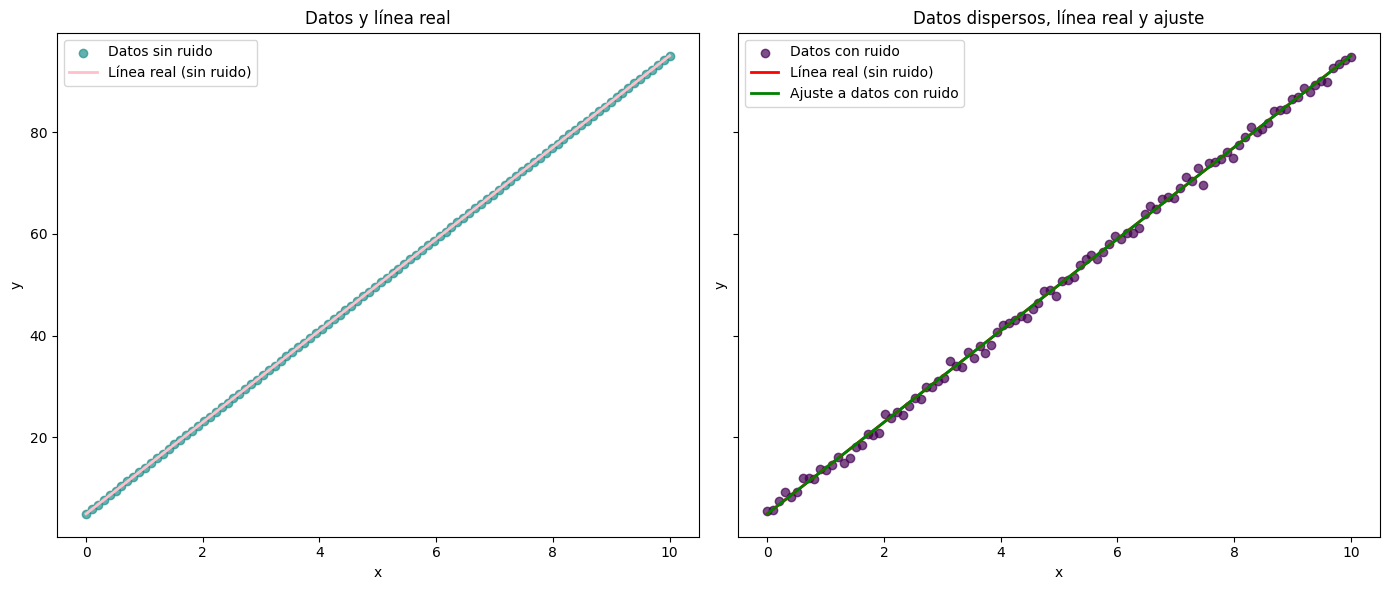

In [12]:
import numpy as np
import matplotlib.pyplot as plt

w0 = 5
w1 = 9

np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
ruido = np.random.normal(0, 1, n)
y = w0 + w1 * x 
y_ruido = w0 + w1 * x + ruido

X = np.vstack([np.ones(n), x]).T  # mariz
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # ec normal

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

axs[1].scatter(x, y_ruido, label='Datos con ruido', alpha=0.7, color=viridis(0))
axs[1].plot(x, w0 + w1 * x, color='red', label='Línea real (sin ruido)', linewidth=2)
axs[1].plot(x, w_hat[0] + w_hat[1]*x, color='green', label='Ajuste a datos con ruido', linewidth=2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Datos dispersos, línea real y ajuste')
axs[1].legend()

axs[0].scatter(x, y, label='Datos sin ruido', alpha=0.7, color=viridis(1))
axs[0].plot(x, w0 + w1 * x, color='pink', label='Línea real (sin ruido)', linewidth=2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Datos y línea real')
axs[0].legend()

plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Parámetros reales de la recta
w0 = 5
w1 = 9
n = 100
x = np.linspace(0, 10, n)

def plot_con_ruido(std_ruido=1.0):
    np.random.seed(42)
    ruido = np.random.normal(0, std_ruido, n)
    y = w0 + w1 * x + ruido

    # Ajuste del modelo usando ecuaciones normales
    X = np.vstack([np.ones(n), x]).T
    w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # Gráfica 1: Datos con ruido y línea real
    axs[0].scatter(x, y, label='Datos con ruido', alpha=0.7, color=viridis(0) )
    axs[0].plot(x, w0 + w1 * x, color='red', label='Línea real (sin ruido)', linewidth=2)
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].set_title('Datos sintéticos y línea real')
    axs[0].legend()

    # Gráfica 2: Comparación línea real vs ajuste
    axs[1].scatter(x, y, label='Datos con ruido', alpha=0.7, color=viridis(0))
    axs[1].plot(x, w0 + w1 * x, color='pink', label='Línea real (sin ruido)', linewidth=2)
    axs[1].plot(x, w_hat[0] + w_hat[1]*x, color='violet', label='Ajuste por ecuación normal', linewidth=2)
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].set_title('Comparación: línea real vs ajuste')
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    print(f"Parámetros reales: w0 = {w0}, w1 = {w1}")
    print(f"Parámetros estimados: w0 = {w_hat[0]:.2f}, w1 = {w_hat[1]:.2f}")

interact(plot_con_ruido, std_ruido=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1, description='Std Ruido'))

interactive(children=(FloatSlider(value=1.0, description='Std Ruido', max=10.0), Output()), _dom_classes=('wid…

<function __main__.plot_con_ruido(std_ruido=1.0)>

## Actividad 2
## 🔧 Instrucciones

- Leer el fichero de datos “DatosRegresion1D.xlsx”.
- Considere la hipótesis (el modelo) de que los puntos se ajustan a una recta que pasa por el origen, de acuerdo con la expresión
$$ℎ(𝑥)=𝑤𝑥$$
- Dibuje un gráfico con los 100 primeros puntos y la hipótesis $𝑤=0.1$.
- Considere la función de coste cuadrática.
- Dibuje la función de coste resultante para valores $𝑤 ∈ [0,0.3]$.
- Dibuje e imprima el valor de $𝑤$ que minimiza el coste.
- El valor óptimo de $𝑤$ puede también calcularse mediante la ecuación normal definida con anterioridad.
- Imprima el valor óptimo obtenido y compárelo con el obtenido con la ecuación normal.
- Dibuje de nuevo los primeros 100 puntos, la hipótesis $𝑤=0.1$ y la hipótesis óptima.
- Dibuje la curva de aprendizaje correspondiente a la generalización del modelo anterior. Para ello:
 - Utilice un número de clientes para entrenar el modelo en el rango $𝑛_{𝑡𝑟𝑎𝑖𝑛} ∈ [10,200]$.
 - Utilice un número de clientes de prueba $𝑛_{𝑡𝑒𝑠𝑡}=𝑛−𝑛_{𝑡𝑟𝑎𝑖𝑛}$, siendo 𝑛=1000 el número total de clientes en el archivo.

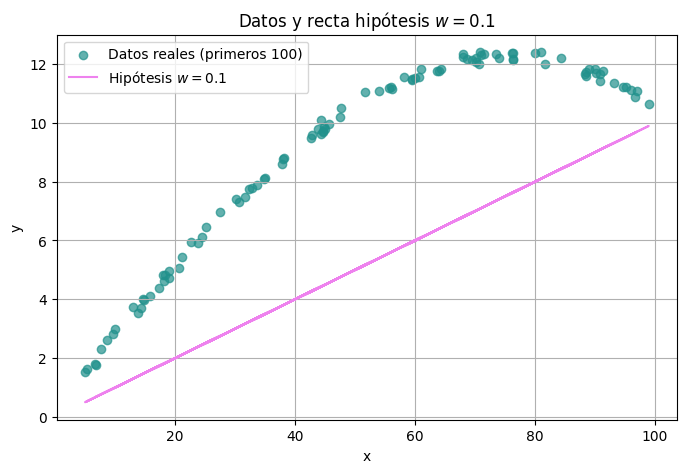

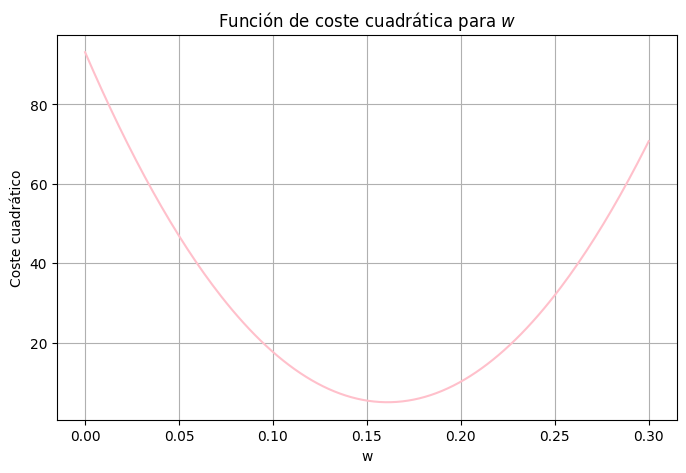

Valor de w que minimiza el coste (búsqueda): 0.1613
Valor óptimo de w por ecuación normal: 0.1610


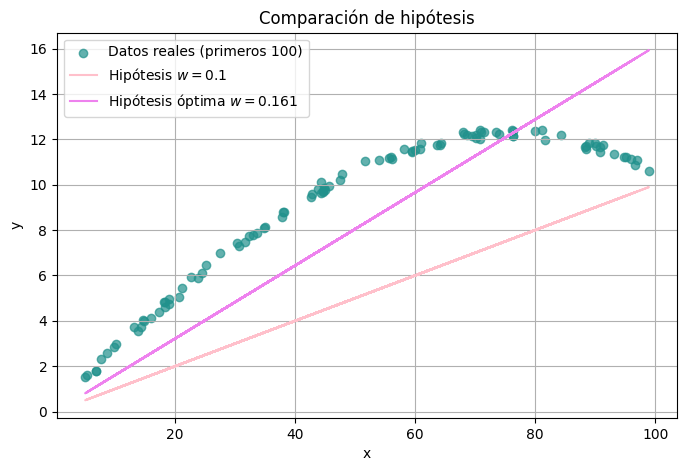

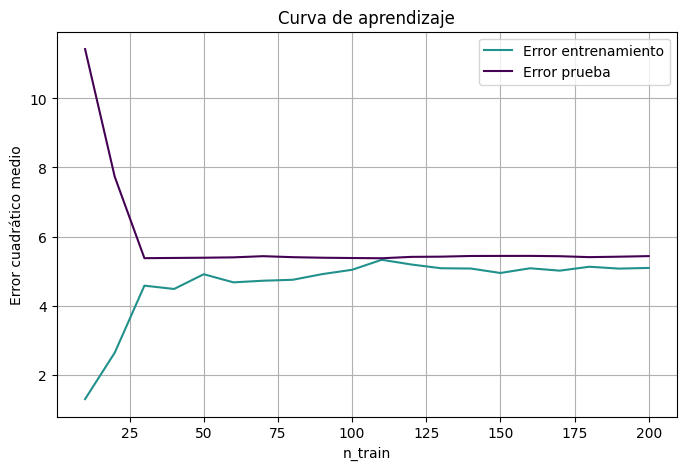

In [16]:
df = pd.read_excel("Datos.xlsx")
x = df.iloc[:100, 0].values
y = df.iloc[:100, 1].values

w_h = 0.1
y_h = w_h * x

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos reales (primeros 100)", alpha=0.7, color=viridis(1))
plt.plot(x, y_h, color='violet', label="Hipótesis $w=0.1$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos y recta hipótesis $w=0.1$")
plt.legend()
plt.grid()
plt.show()

w_values = np.linspace(0, 0.3, 200)
costes = [np.mean((y - w*x)**2) for w in w_values]

plt.figure(figsize=(8,5))
plt.plot(w_values, costes, color='pink')
plt.xlabel("w")
plt.ylabel("Coste cuadrático")
plt.title("Función de coste cuadrática para $w$")
plt.grid()
plt.show()

w_opt = w_values[np.argmin(costes)]
print(f"Valor de w que minimiza el coste (búsqueda): {w_opt:.4f}")

w_normal = np.sum(x*y) / np.sum(x**2)
print(f"Valor óptimo de w por ecuación normal: {w_normal:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos reales (primeros 100)", alpha=0.7, color=viridis(1))
plt.plot(x, w_h*x, color='pink', label="Hipótesis $w=0.1$")
plt.plot(x, w_normal*x, color='violet', label=f"Hipótesis óptima $w={w_normal:.3f}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de hipótesis")
plt.grid()
plt.legend()
plt.show()

n_total = len(df)
x_all = df.iloc[:,0].values
y_all = df.iloc[:,1].values

n_train_range = np.arange(10, 201, 10)
train_errors = []
test_errors = []

for n_train in n_train_range:
    x_train = x_all[:n_train]
    y_train = y_all[:n_train]
    x_test = x_all[n_train:1000]
    y_test = y_all[n_train:1000]
    
    w_learn = np.sum(x_train*y_train) / np.sum(x_train**2)
    train_pred = w_learn * x_train
    test_pred = w_learn * x_test
    train_errors.append(np.mean((y_train - train_pred)**2))
    test_errors.append(np.mean((y_test - test_pred)**2))

plt.figure(figsize=(8,5))
plt.plot(n_train_range, train_errors, label="Error entrenamiento", color=viridis(1))
plt.plot(n_train_range, test_errors, label="Error prueba", color=viridis(0))
plt.xlabel("n_train")
plt.ylabel("Error cuadrático medio")
plt.title("Curva de aprendizaje")
plt.legend()
plt.grid()
plt.show()

- La hipotesis inicial 0.1 no se ajusta bien a los datos reales
- La funcion de coste cuadratica muestra el valor optimo de w para ajustar los datos 
- Por tanto la recta con hipotesis optima se ajusta mejor a los datos 
- A medida que aummentan los datos de entrenamiento, el error de entrenamiento y prueba se estabilizan, indicando que el modelo generaliza mejor y el ajuste es más preciso con los datos 
